# Project: World CO2 Emissions #

## Contents
  * [1. Imports](#1)
  * [2. Load data](#2)
  * [3. Data Wrangling](#3)
  * [4. Explore the Data](#4)
    * [4.1 How the global CO2 emission has changed in the history? How is it related to temperature change?](#4.1)
    * [4.2 Which countries have the leading CO2 emission in 2022?](#4.2)
    * [4.3 Historical trend of CO2 emission  by countries](#4.3)
  * [5. Summary and Future Work](#5)

## 1. Imports<a id='1'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 2. Load data<a id='2'></a>

The data is downloaded from: https://github.com/owid/co2-data.

In [2]:
datafile = './data/co2-data.csv'
# datafile = 'co2-data.csv'
df = pd.read_csv(datafile)

## 3. Data wrangling<a id='3'></a>

In [3]:
df.head()

,country,year,iso_code,co2,temperature_change_from_co2,gdp,population
0,Afghanistan,1850,AFG,NaN,NaN,NaN,3752993.0
1,Afghanistan,1851,AFG,NaN,0.0,NaN,3767956.0
2,Afghanistan,1852,AFG,NaN,0.0,NaN,3783940.0
3,Afghanistan,1853,AFG,NaN,0.0,NaN,3800954.0
4,Afghanistan,1854,AFG,NaN,0.0,NaN,3818038.0


In [4]:
df.shape

(48058, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48058 entries, 0 to 48057
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      48058 non-null  object 
 1   year                         48058 non-null  int64  
 2   iso_code                     39717 non-null  object 
 3   co2                          30308 non-null  float64
 4   temperature_change_from_co2  41724 non-null  float64
 5   gdp                          14564 non-null  float64
 6   population                   39495 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 2.6+ MB


#### Check missing values:

In [6]:
df.isnull().sum()

country                            0
year                               0
iso_code                        8341
co2                            17750
temperature_change_from_co2     6334
gdp                            33494
population                      8563
dtype: int64

#### Dealing with missing values:

In [7]:
df = df[df['co2'].notna()]

#### Check duplicated rows:

In [8]:
df[df.duplicated(keep=False)]

,country,year,iso_code,co2,temperature_change_from_co2,gdp,population


There are no duplicated rows in this dataset.

## 4. Explore the Data<a id='4'></a>

### 4.1 How the global CO2 emission has changed in the history?  How is it related to temperature change?<a id='4.1'></a>

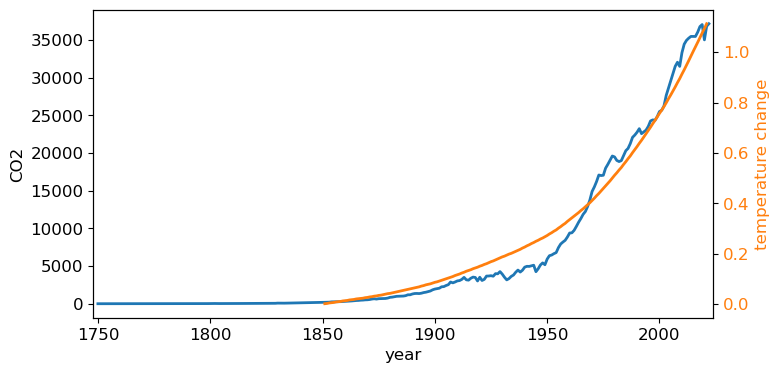

In [9]:
world = df[df['country'] == 'World']

fig = plt.figure(figsize=(8,4))
ax = plt.axes()
ax.set_xlabel('year',fontsize=12)
ax.set_ylabel('CO2',fontsize=12)
xmin, xmax = min(world.year)-2, max(world.year)+2
ax.set_xlim(xmin,xmax)
ax.tick_params(axis='both', labelsize=12)
ax.plot(world.year,world.co2,linewidth=2)

ax2 = ax.twinx()
color = '#ff7f0e'
ax2.set_ylabel('temperature change', color=color, fontsize=12)
ax2.plot(world.year,world.temperature_change_from_co2, color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color, labelsize=12)

plt.show()

### Findings: 
- Global CO2 emission remained at a low-level before the Industrial Evolution around 1850. 
- Since then, global CO2 emission increased fastly, especially in the 20 century.
- Global CO2 emission seems to be slowing down in the recent decades, apparently due to efforts towards reducing CO2 emission.
- The increase of global CO2 emission well matches the global temperature increase, suggesting that CO2 emission may be the main cause for global warming.

### 4.2 Which countries have the leading CO2 emission in 2022?<a id='4.2'></a>

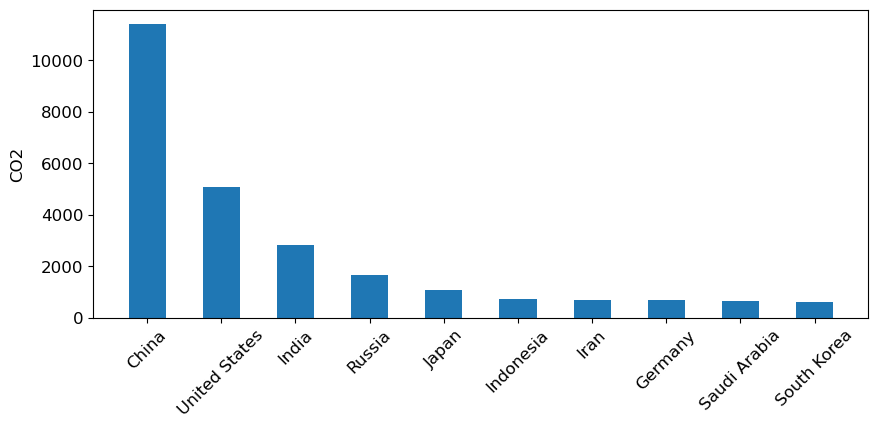

In [10]:
df_country = df[df['iso_code'].notna()]
co2_2022 = df_country[df_country['year'] == 2022]   # Select 2022

num_country = 10
co2_2022 = co2_2022.sort_values('co2',ascending=False).iloc[0:num_country]

fig = plt.figure(figsize=(10,4))
ax = plt.axes()
ax.set_ylabel('CO2',fontsize=12)
ax.tick_params(axis='both', labelsize=12)
ax.tick_params(axis='x', labelrotation=45)
ax.bar(co2_2022.country,co2_2022.co2, width=0.5)
plt.show()

### Finding:
- China has the largest CO2 emission in 2022, followed by United States, India, Russia and Japan among others.
- CO2 emission in China is two times larger than in the United States, and more than three times larger than in India.

### 4.3. Historical trend of CO2 emission by countries<a id='4.3'></a>

What is the historical trend of CO2 emission of China, US, and India, which have the largest CO2 emission in 2022?

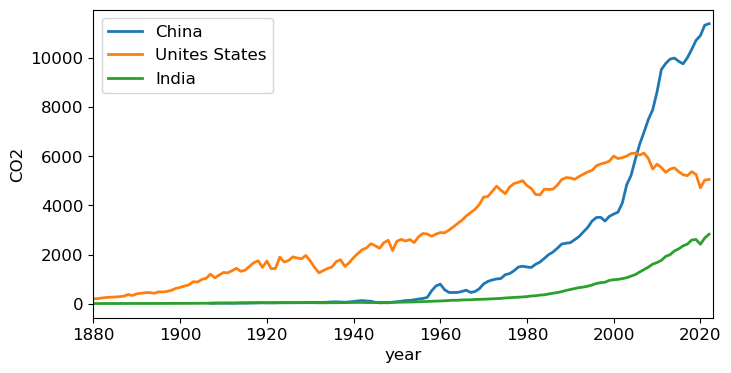

In [11]:
co2_China = df[df['country'] == 'China']
co2_US = df[df['country'] == 'United States']
co2_India = df[df['country'] == 'India']

fig = plt.figure(figsize=(8,4))
ax = plt.axes()
ax.set_xlabel('year',fontsize=12)
ax.set_ylabel('CO2',fontsize=12)
xmin, xmax = 1880, 2023
ax.set_xlim(xmin,xmax)
ax.tick_params(axis='both', labelsize=12)
ax.plot(co2_China.year,co2_China.co2, co2_US.year,co2_US.co2, co2_India.year,co2_India.co2, linewidth=2)
ax.legend(['China','Unites States','India'],fontsize=12,loc='upper left')
plt.show()

### Findings:
- United States' CO2 emission started to increase earlier than China and India, but it stablized and slightly decrease after 2000.
- From 1960, China's CO2 emission increased fastly and surpassed United State's emission in around 2005.
- China's CO2 emission has been increasing with a faster pace than United States and India in the recent decades.

## 5. Summary and Future Work<a id='5'></a>

Summary:
- Global CO2 began increasing after the 1850s and has been experiencing fast increase since the 1950s.
- Increase of global CO2 emission is consistent with global temperature increase, indicating a high correlation between them.
- China and United States are the two leading countries with most CO2 emissions.
- Developed countries like United States sees CO2 increase started from earlier but got stablized in recent decades. Developing countries like China and India are experiencing fast CO2 emission increase in recent decades.

What to explore next?
- What is each contry's proportional contribution to global CO2 emission?
- How has the contribution evolved in history?
- Does CO2 emission has any relationship with GDP and population?